# 🌲 Random Forest — Complete Theory, Intuition & Code (Clean Notes)

---

## 1. What is Random Forest?

**Random Forest** is an **ensemble machine learning algorithm** used for both:

* **Classification**
* **Regression**

It builds **multiple decision trees** and combines their outputs to produce a **more accurate and stable prediction**.

> Think of Random Forest as **"many weak trees → one strong model"**.

---

## 2. Why is it called *Random Forest*?

### Forest

* A collection of **many decision trees**
* Each tree is a base learner

### Random

Randomness is introduced at **two levels**:

1. **Row sampling (Bootstrapping)**
2. **Feature sampling (Column sampling)**

This randomness reduces correlation between trees and improves generalization.

---

## 3. Prerequisites to Understand Random Forest

You must know:

* **Decision Trees** (splits, nodes, depth)
* **Bagging (Bootstrap Aggregation)**

Random Forest = **Bagging + Decision Trees + Feature Randomness**

---

## 4. Bagging (Bootstrap Aggregation)

### Step 1: Bootstrapping (Row Sampling)

Given a dataset with $N$ rows:

* Randomly sample $N$ rows **with replacement**
* Some rows may repeat
* Some rows may be missing

This creates a **new training dataset** for each tree.

### Why with replacement?

* Ensures diversity
* Reduces variance

---

## 5. Feature Sampling (Column Sampling)

At **each split** of a decision tree:

* Randomly select a subset of features
* Choose the best split **only from those features**

### Typical values

* Classification: $\sqrt{p}$ features
* Regression: $\frac{p}{3}$ features

where $p$ = total number of features.

---

## 6. How Random Forest Works (Step-by-Step)

1. Create multiple bootstrap samples from original data
2. Train one **decision tree** on each sample
3. At every split, consider only random subset of features
4. Repeat for all trees
5. Aggregate predictions

---

## 7. Aggregation (Voting / Averaging)

### Classification

* Each tree gives a class prediction
* Final output = **majority vote**

$$
\hat{y} = \text{mode}(y_1, y_2, \dots, y_T)
$$

### Regression

* Each tree gives a numeric value
* Final output = **average**

$$
\hat{y} = \frac{1}{T} \sum_{i=1}^{T} y_i
$$

---

## 8. Why Random Forest Works So Well

| Problem             | How RF fixes it          |
| ------------------- | ------------------------ |
| Overfitting         | Bagging reduces variance |
| High variance trees | Averaging stabilizes     |
| Feature dominance   | Feature sampling         |
| Noise               | Ensemble smooths noise   |

---

## 9. Bias–Variance Perspective

* Single decision tree → **low bias, high variance**
* Random Forest → **low bias, low variance**

This is the core strength of Random Forest.

---

## 10. Manual Intuition (What the video demonstrated)

Each tree:

* Sees a **different subset of rows**
* Sees a **different subset of columns**
* Learns a **different structure**

Hence trees disagree → voting resolves conflict.

This is exactly what was shown via custom sampling functions.

---

## 11. Python Implementation (scikit-learn)

### Classification Example

```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
```

---

## 12. Important Hyperparameters

### n_estimators

* Number of trees
* More trees → better performance (up to a point)

### max_depth

* Maximum depth of each tree
* Controls overfitting

### max_features

* Number of features considered per split

### min_samples_split / min_samples_leaf

* Minimum samples to split a node
* Prevents very deep trees

---

## 13. Random Forest for Regression

```python
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=200)
rf_reg.fit(X_train, y_train)
rf_reg.predict(X_test)
```

Aggregation here is **mean**, not voting.

---

## 14. Random Forest vs Bagging

| Bagging             | Random Forest          |
| ------------------- | ---------------------- |
| Only row sampling   | Row + feature sampling |
| Trees can correlate | Trees decorrelated     |
| Less powerful       | More robust            |

Random Forest is a **specialized form of bagging**.

---

## 15. Random Forest vs Decision Tree

| Decision Tree   | Random Forest      |
| --------------- | ------------------ |
| Overfits easily | Robust             |
| High variance   | Low variance       |
| Interpretable   | Less interpretable |

---

## 16. Advantages

* Works well out-of-the-box
* Handles non-linear data
* Handles mixed data types
* Resistant to overfitting

---

## 17. Limitations

* Slower than single tree
* Large memory usage
* Less interpretable

---

## 18. Interview-Ready One-Liners

* Random Forest reduces variance using bagging
* Randomness comes from row & feature sampling
* Classification → majority vote
* Regression → averaging
* Usually strong baseline model

---

## 19. When to Use Random Forest

✅ Medium-sized datasets
✅ Non-linear patterns
✅ Tabular data

❌ Very large datasets (use boosting)
❌ Need interpretability

---

## 20. Final Summary

Random Forest:

* Is an ensemble of decision trees
* Uses randomness to improve generalization
* Combines predictions democratically
* Delivers strong performance with minimal tuning

> **If Logistic Regression fails and you want a strong baseline → Random Forest is the safest choice.**


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [ ]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [ ]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.737459,0.187339,0.600579,-1.242089,1.588177,1
1,3.412872,3.195321,2.103050,2.072946,4.889139,1
2,0.695584,-0.029298,0.146801,-3.100682,1.036631,1
3,2.692155,2.041024,-0.813188,-0.526351,-0.234857,0
4,-1.473331,-0.991686,-0.824713,-3.533495,-1.852485,1


In [ ]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [ ]:
import random

In [ ]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [ ]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)


df1 = combined_sampling(df,0.5,0.5)

/tmp/ipython-input-3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [ ]:
df2 = combined_sampling(df,0.5,0.5)

/tmp/ipython-input-3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [ ]:
df3 = combined_sampling(df,0.5,0.5)

/tmp/ipython-input-3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [ ]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col4', 'col5', 'target'], dtype='object')
Index(['col5', 'col1', 'target'], dtype='object')
Index(['col1', 'col5', 'target'], dtype='object')


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()


clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.59375, 0.9444444444444444, 'x[1] <= 0.173\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.3125, 0.8333333333333334, 'x[0] <= -2.897\ngini = 0.417\nsamples = 27\nvalue = [19, 8]'),
 Text(0.453125, 0.8888888888888888, 'True  '),
 Text(0.25, 0.7222222222222222, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.375, 0.7222222222222222, 'x[0] <= -1.053\ngini = 0.236\nsamples = 22\nvalue = [19, 3]'),
 Text(0.3125, 0.6111111111111112, 'x[0] <= -1.504\ngini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(0.1875, 0.5, 'x[0] <= -1.917\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.125, 0.3888888888888889, 'x[0] <= -2.066\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.0625, 0.2777777777777778, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.1875, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.25, 0.3888888888888889, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.4375, 0.5, 'x[1] <= -1.544\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'

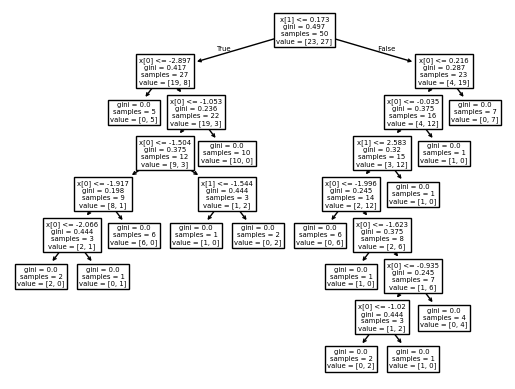

In [ ]:
from sklearn.tree import plot_tree
plot_tree(clf1)

[Text(0.5454545454545454, 0.9375, 'x[0] <= -0.186\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.2727272727272727, 0.8125, 'x[1] <= -0.036\ngini = 0.365\nsamples = 25\nvalue = [19, 6]'),
 Text(0.40909090909090906, 0.875, 'True  '),
 Text(0.18181818181818182, 0.6875, 'x[0] <= -1.676\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.09090909090909091, 0.5625, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.2727272727272727, 0.5625, 'x[0] <= -1.091\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.18181818181818182, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.36363636363636365, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.36363636363636365, 0.6875, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.8181818181818182, 0.8125, 'x[1] <= 3.607\ngini = 0.365\nsamples = 25\nvalue = [6, 19]'),
 Text(0.6818181818181819, 0.875, '  False'),
 Text(0.7272727272727273, 0.6875, 'x[0] <= 3.566\ngini = 0.33\nsamples = 24\nvalue = [5, 19]'),
 Text(0.63636

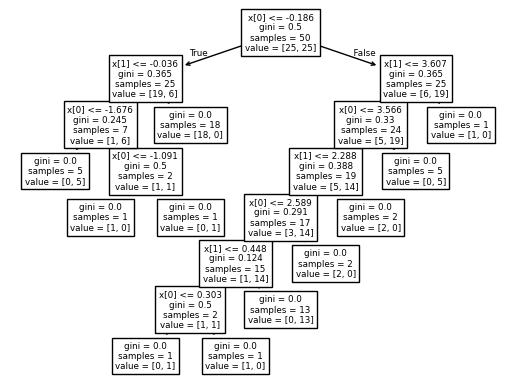

In [ ]:
plot_tree(clf2)

[Text(0.6, 0.9166666666666666, 'x[1] <= 0.264\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.4, 0.75, 'x[0] <= 0.22\ngini = 0.391\nsamples = 30\nvalue = [22, 8]'),
 Text(0.5, 0.8333333333333333, 'True  '),
 Text(0.3, 0.5833333333333334, 'x[1] <= -0.654\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.2, 0.4166666666666667, 'x[0] <= -0.992\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.1, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.3, 0.25, 'x[1] <= -1.644\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.2, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4, 0.4166666666666667, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.5833333333333334, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.8, 0.75, 'x[1] <= 0.856\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.7, 0.8333333333333333, '  False'),
 Text(0.7, 0.5833333333333334, 

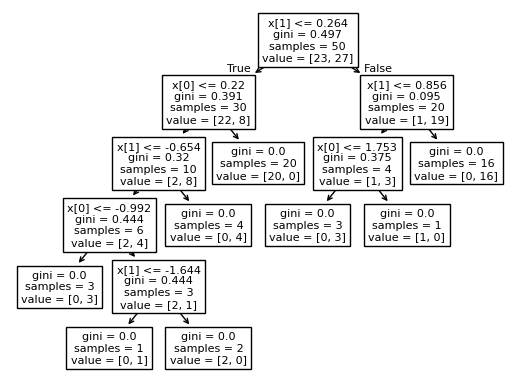

In [ ]:
plot_tree(clf3)

In [ ]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
21,1.822375,1.232069,-2.495191,-0.943779,-1.301350,0
27,2.969067,0.932533,-2.230623,-0.946202,1.239901,0
5,1.459173,0.683868,-0.893171,-1.825785,-0.606098,0
95,1.022247,1.752042,0.186789,-0.922813,2.038415,1
9,1.434660,1.537763,-2.219489,-0.693768,-2.538442,0
84,1.465602,0.830588,-3.046595,-1.345619,-1.842181,0
71,-0.233944,0.595463,0.874179,-1.571318,-1.651714,0
1,3.412872,3.195321,2.103050,2.072946,4.889139,1
29,0.683862,1.797878,0.953837,-0.934914,0.434870,1
65,1.898723,0.946973,0.877548,-1.880917,0.092691,0
